In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
plt.style.use('seaborn-notebook')

In [2]:
# load trajectories
tracks = np.load('sample_data/1001-8_roi_0_tracks.npy')
# select single trajectory
coords, frame_num = tracks[['coords', 'frame_num']][200]
n_pts = len(coords)
xs, ys = coords.T
ts = np.arange(frame_num-len(coords)+1, frame_num+1)

# coords = tracks['coords']
# frame_num = tracks['frame_num']
# print((coords.shape, frame_num.shape))

# Trajectory as vector function

Trajectory is defined by the following vector-valued function:
$$\vec{r}(t) = \begin{bmatrix} x(t) \\ y(t) \end{bmatrix}$$ 

<IPython.core.display.Javascript object>


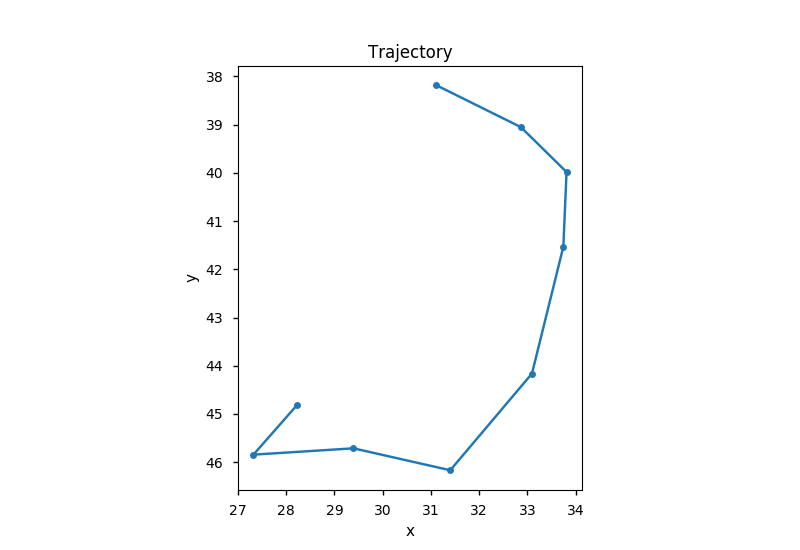

In [3]:
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
ax.plot(xs, ys, '.-', ms=10.0)

# show position vectors
# for t, x, y in zip(ts, xs, ys):
#     ax.arrow(0, 0, x, y, ls=':', head_width=0.2, head_length=0.3, length_includes_head=True)
#     ax.annotate('t={}'.format(t), np.array((x, y))-0.05, fontsize=6)
ax.invert_yaxis()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Trajectory')

# from matplotlib.collections import LineCollection
# lc = LineCollection(coords, linewidths=0.2)
# ax.add_collection(lc)
# ax.autoscale(True)
# plt.show()

# 1. Compute tangent vectors and unit tangent vectors

In order to compute the unit tangent vector, we need the tangent vector to the curve along with their corresponding magnitudes.

$$\vec{r}'(t) = \begin{bmatrix} x'(t) \\ y'(t) \end{bmatrix}$$

$$\lVert \vec{r}'(t) \rVert = \sqrt{x'(t)^2 + y'(t)^2}$$

In [4]:
x_prime = np.gradient(xs)
y_prime = np.gradient(ys)
xy_prime_mag = np.linalg.norm(np.column_stack((x_prime, y_prime)), axis=1)

x_prime2 = np.gradient(xs, edge_order=2)
y_prime2 = np.gradient(ys, edge_order=2)

The velocity vector $\vec{v}(t)$ is the derivative of the position. The unit tangent vector T (which is also the velocity vector, since the particle is moving with unit speed) also depends on time.

$$\vec{v}(t) = \vec{r}'(t) = \begin{bmatrix} x'(t) \\ y'(t) \end{bmatrix}$$

<IPython.core.display.Javascript object>


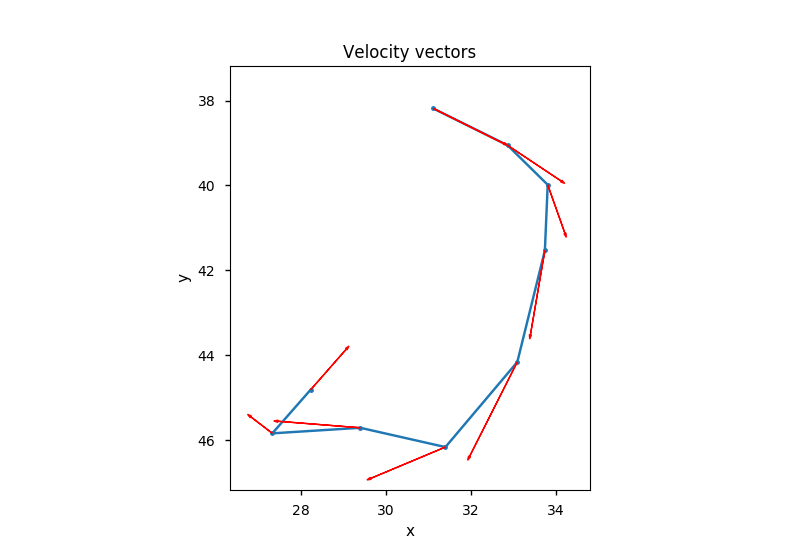

In [10]:
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
ax.plot(xs, ys, '.-')
pad = 1.0
ax.set_xlim(xs.min()-pad, xs.max()+pad); ax.set_ylim(ys.min()-pad, ys.max()+pad);
# for x, y, dx, dy in zip(xs, ys, x_prime, y_prime):
#     arr = ax.arrow(x, y, dx, dy, head_width=0.05, head_length=0.1, linewidth=1.0, fc='r', ec='r', zorder=100, 
#                    length_includes_head=True)
for x, y, dx, dy in zip(xs, ys, x_prime, y_prime):
    arr = ax.arrow(x, y, dx, dy, head_width=0.05, head_length=0.1, linewidth=1.0, fc='r', ec='r', zorder=100, 
                   length_includes_head=True)
# for x, y, dx, dy in zip(xs, ys, x_prime2, y_prime2):
#     arr = ax.arrow(x, y, dx, dy, head_width=0.05, head_length=0.1, linewidth=1.0, fc='g', ec='g', zorder=100, 
#                    length_includes_head=True)
ax.set_title('Velocity vectors')
ax.invert_yaxis()
ax.set_xlabel('x')
ax.set_ylabel('y')

We then divide the tangent vectors by their magnitudes to get the unit tangent vectors.

$$T(t) = \frac{\vec{r}'(t)}{\lVert \vec{r}'(t) \rVert} = 
\begin{bmatrix}
    \frac{x'(t)}{\sqrt{x'(t)^2 + y'(t)^2}} \\
    \frac{y'(t)}{\sqrt{x'(t)^2 + y'(t)^2}}
\end{bmatrix}$$

In [6]:
Tx = x_prime / xy_prime_mag
Ty = y_prime / xy_prime_mag

<IPython.core.display.Javascript object>


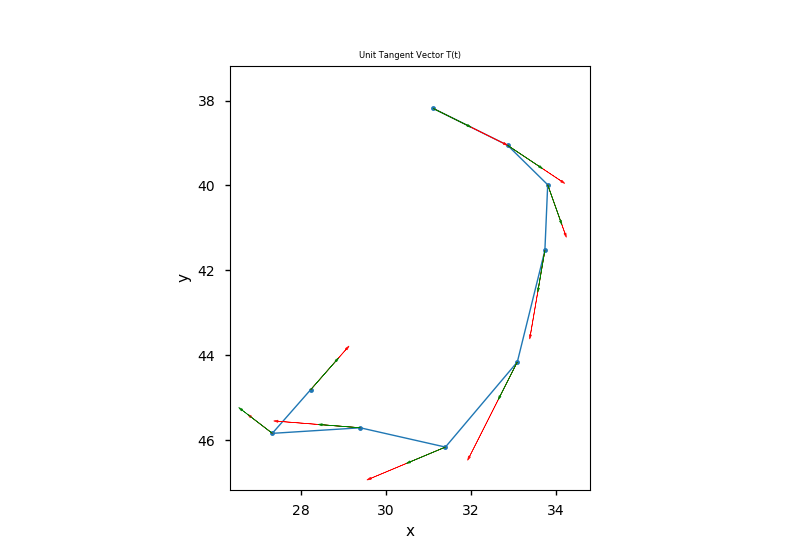

In [7]:
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
ax.plot(xs, ys, '.-', zorder=1, lw=1.0)
pad = 1.0
ax.set_xlim(xs.min()-pad, xs.max()+pad); ax.set_ylim(ys.min()-pad, ys.max()+pad);
# velocity vectors
for x, y, dx, dy in zip(xs, ys, x_prime, y_prime):
    ax.arrow(x, y, dx, dy, head_width=0.05, head_length=0.1, fc='r', ec='r', zorder=2, length_includes_head=True, lw=0.5)
# unit velocity vectors
for x, y, dx, dy in zip(xs, ys, Tx, Ty):
    ax.arrow(x, y, dx, dy, head_width=0.05, head_length=0.1, fc='g', ec='g', zorder=3, length_includes_head=True, lw=0.5)
ax.set_title('Unit Tangent Vector T(t)', fontsize=6)
ax.invert_yaxis()
ax.set_xlabel('x')
ax.set_ylabel('y')

# Step 2: Compute curvature

The curvature $\kappa$ is the magnitude of the derivative of the unit tangent vector, but with respect to arc length $s$, not the parameter $t$.

$$\kappa = \lVert \frac{dT}{ds} \rVert$$

In order to compute this we first differentiate $T$ with respect to $t$, then divide by the magnitude $\lVert \vec{r}'(t) \rVert$, which you can think of as $\frac{ds}{dt}$.

$$\kappa = \lVert \frac{dT}{ds} \rVert = \frac{\lVert T'(t) \rVert}{\lVert \vec{r}'(t) \rVert}$$

In [8]:
# compute ||T'(t)||
Tx_prime = np.gradient(Tx, edge_order=2)
Ty_prime = np.gradient(Ty, edge_order=2)
Txy_prime_mag = np.linalg.norm(np.column_stack((Tx_prime, Ty_prime)), axis=1)

# compute k
K = Txy_prime_mag / xy_prime_mag

<IPython.core.display.Javascript object>


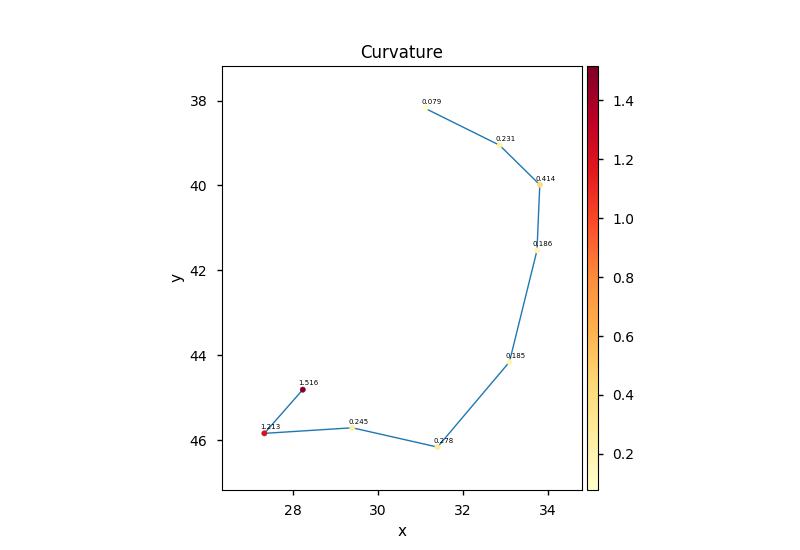

In [9]:
# plot line
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
ax.set_title('Curvature')
ax.plot(xs, ys, '-', zorder=1, lw=1.0)
pad = 1.0
ax.set_xlim(xs.min()-pad, xs.max()+pad); ax.set_ylim(ys.min()-pad, ys.max()+pad);
ax.invert_yaxis()
ax.set_xlabel('x')
ax.set_ylabel('y')
# plot points with color based on curvature value
scat = ax.scatter(xs, ys, s=15, zorder=2, c=K, cmap='YlOrRd')
# color bar for curvature values
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.05)
fig.colorbar(scat, cax=cax, orientation='vertical')
# annotate points with curvature value
for x, y, k in zip(xs, ys, K):
    ax.annotate('{:.3f}'.format(k), np.array((x, y))-0.1, fontsize=5)
#     ax.annotate('{:.3f}'.format(k), np.array((x, y))-0.1, fontsize=5, color=scat.to_rgba(k))